# Web Scrapping

**Documentación**

https://beautiful-soup-4.readthedocs.io/en/latest/

**Tutoriales:**

https://www.makeuseof.com/beautiful-soup-tutorial/

https://youtu.be/4UcqECQe5Kc

# Librerías

In [6]:
from bs4 import BeautifulSoup #BeautifulSoup versión 4
import lxml #HTML parser (Analizador sintáctico HTML)
import html5lib #Otro HTML parser (hay varios).
import requests #Librería para capturar el contenido de páginas web

# Pasos

   1. **Capturar** el contenido de la **página web** con la **librería requests**: url_contents=requests.get("url").text
    
   2. **Se le pasa la captura a BeautifulSoup** que **interpreta el HTML** capturado **con un parser**:
    
        soup=BeautifulSoup(content,'lxml')
        
   3. **Inspeccionar en la página web los elementos que se desean capturar**.
        
        La página HTML tiene una serie de **tags que tienen estructura y jerarquía**. Se necesita **copiar los tags deseados** para capturar los elementos correctos desde BeautifulSoup.
        
   4. Usar método **elemento=soup.find('tag','<otras condiciones de búsqueda>')** para capturar el elemento deseado.
    
   5. Utilizar el elemento o elementos capturado/s para el **procesamiento** que se desee.
        
        
    

# Captura de páginas web

In [7]:
import requests
link="https://www.elpais.es"
contents=requests.get(link).text
print(contents)

<!DOCTYPE html><html lang="es"><head><link rel="icon" type="image/x-icon" href="https://static.elpais.com/dist/resources/images/favicon.ico"/><title>EL PAÍS: el periódico global</title><meta name="lang" content="es"/><meta name="author" content="Ediciones El País"/><meta name="robots" content="index,follow"/><meta name="description" content="Noticias de última hora sobre la actualidad en España y el mundo: política, economía, deportes, cultura, sociedad, tecnología, gente, opinión, viajes, moda, televisión, los blogs y las firmas de EL PAÍS. Además especiales, vídeos, fotos, audios, gráficos, entrevistas, promociones y todos los servicios de EL PAÍS."/><meta http-equiv="Refresh" content="900"/><meta name="organization" content="Ediciones EL PAÍS S.L."/><meta property="article:publisher" content="https://www.facebook.com/elpais/"/><meta property="og:title" content="EL PAÍS: el periódico global"/><meta property="og:description" content="Noticias de última hora sobre la actualidad en Espa

# Haciendo la sopa con BeautifulSoup

Se le pasa el **contenido de una página web a una instancia BeautifulSoup**. También se le pasa un parser para interpretar el html (si no se le pasa un parser BeautifulSoup utiliza uno por defecto).

In [3]:
soup=BeautifulSoup(contents,'html5lib')
soup

<!DOCTYPE html>
<html lang="es"><head><link href="https://static.elpais.com/dist/resources/images/favicon.ico" rel="icon" type="image/x-icon"/><title>EL PAÍS: el periódico global</title><meta content="es" name="lang"/><meta content="Ediciones El País" name="author"/><meta content="index,follow" name="robots"/><meta content="Noticias de última hora sobre la actualidad en España y el mundo: política, economía, deportes, cultura, sociedad, tecnología, gente, opinión, viajes, moda, televisión, los blogs y las firmas de EL PAÍS. Además especiales, vídeos, fotos, audios, gráficos, entrevistas, promociones y todos los servicios de EL PAÍS." name="description"/><meta content="900" http-equiv="Refresh"/><meta content="Ediciones EL PAÍS S.L." name="organization"/><meta content="https://www.facebook.com/elpais/" property="article:publisher"/><meta content="EL PAÍS: el periódico global" property="og:title"/><meta content="Noticias de última hora sobre la actualidad en España y el mundo: política, 

# Inspeccionar la página web y copiar los tags que se quieren capturar

Se **selecciona el elemento deseado en la página web**.

Se saca la pantalla de **inspección de código HTML**.

Se **copia el tag** del elemento en dicha ventana.

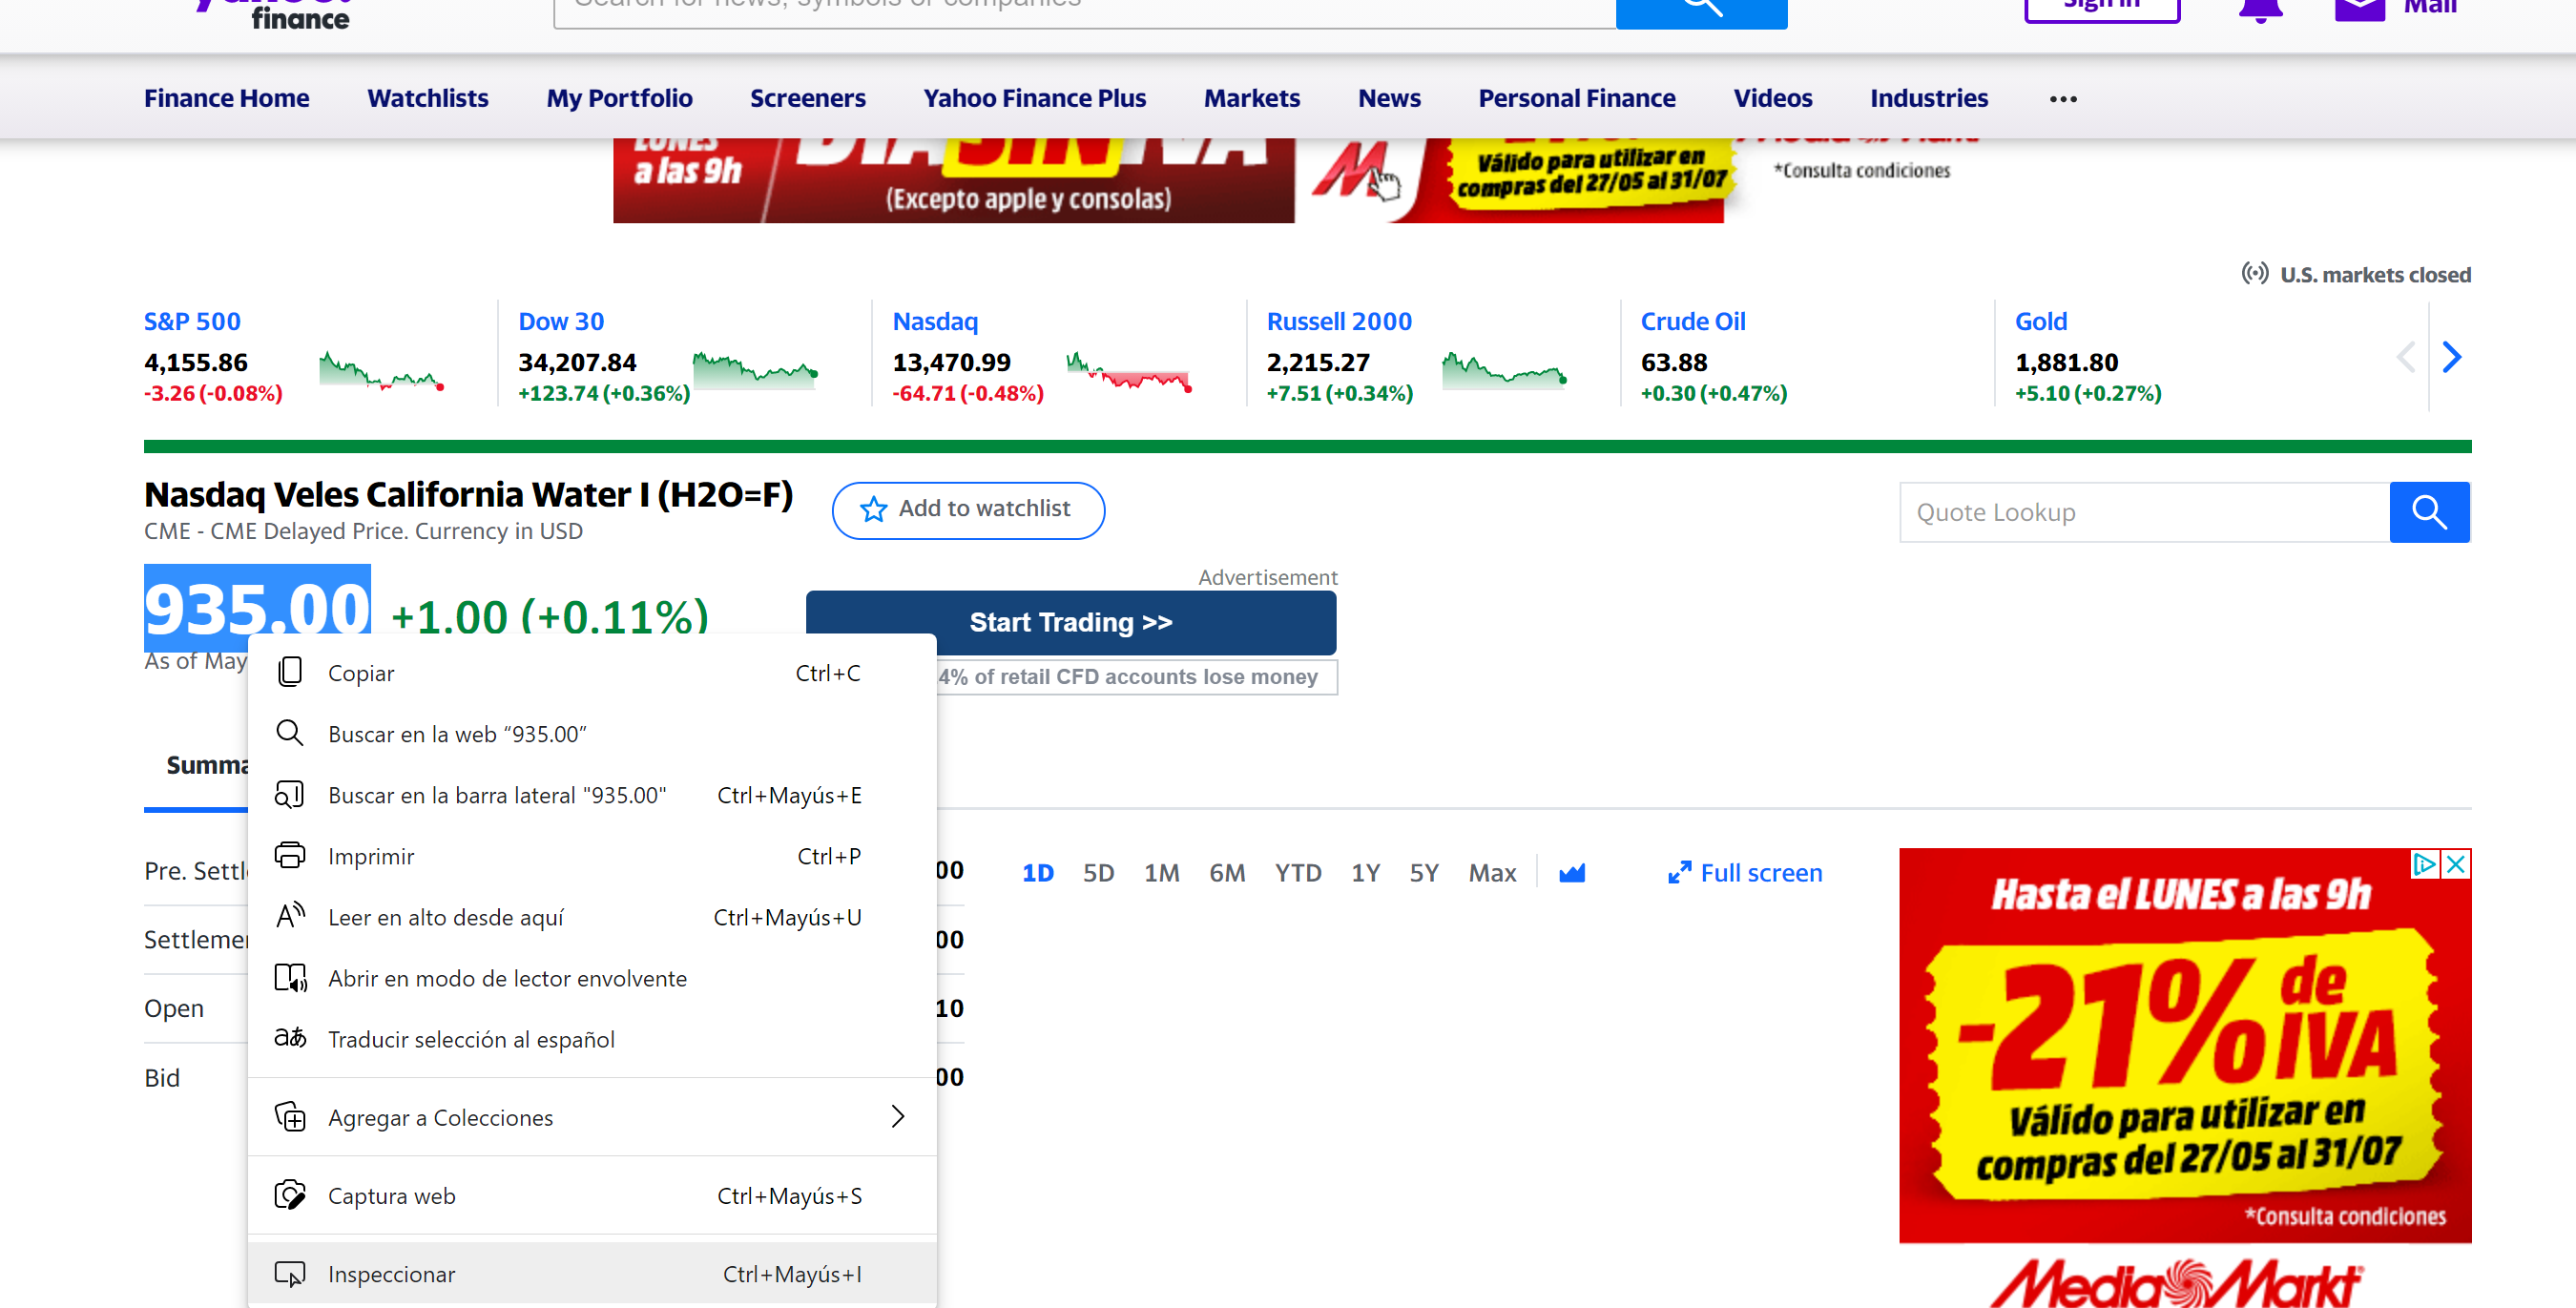

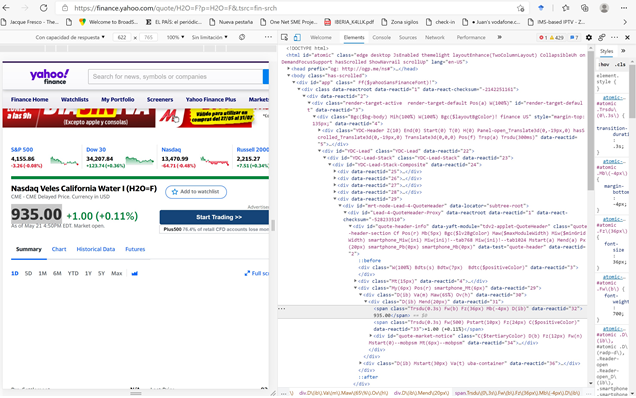

# Inspeccionar en la sopa los tags deseados

In [8]:
'''
El tag de la cotización de un activo financiero en la web de yahoo es
<span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)">9,204.00</span>
En este caso 9,204.00 es la cotización que buscamos capturar.
'''



link="https://finance.yahoo.com/quote/%5EIBEX?p=^IBEX&.tsrc=fin-srch" #Cotización del Ibex35 en la web de yahoo Finance
contents=requests.get(link).text
soup=BeautifulSoup(contents)

'''
Ponemos una doble condición al método find:

- El tag a capturar es de tipo 'span'

- La clase dentro del tag="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)"

'''

cotizacion=soup.find('span',class_="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)").text
print('Cotización capturada con webscrapping:',cotizacion)

Cotización capturada con webscrapping: 9,089.70


# Práctica de web scrapping

1. Escribe el código para una **aplicación que pida por pantalla el código Yahoo de un stock market que desee el usuario**.

2. **El código** de stock introducido por el usuario **es capturado**.

3. **Capturar** el contenido de la **URL correspondiente** al código introducido.

4. **Capturar e imprimir** dos elementos:

    4.1 La **cotización**
    
    4.2 Resumen de la cuantía de dicha cotización en términos de **subida/baja porcentual** respecto al valor anterior.
    

**Guia**: 

   - Usa el siguiente código para pedir y capturar una entrada de usuario:
    
        **entrada=input('Mete el id del stock que quieras consultar') para** 
        
   - En la web de yahoo **cada stock tiene su propio código**, usa dicho código para indicar el stock que se quiere visualizar:
    

    
    
    

 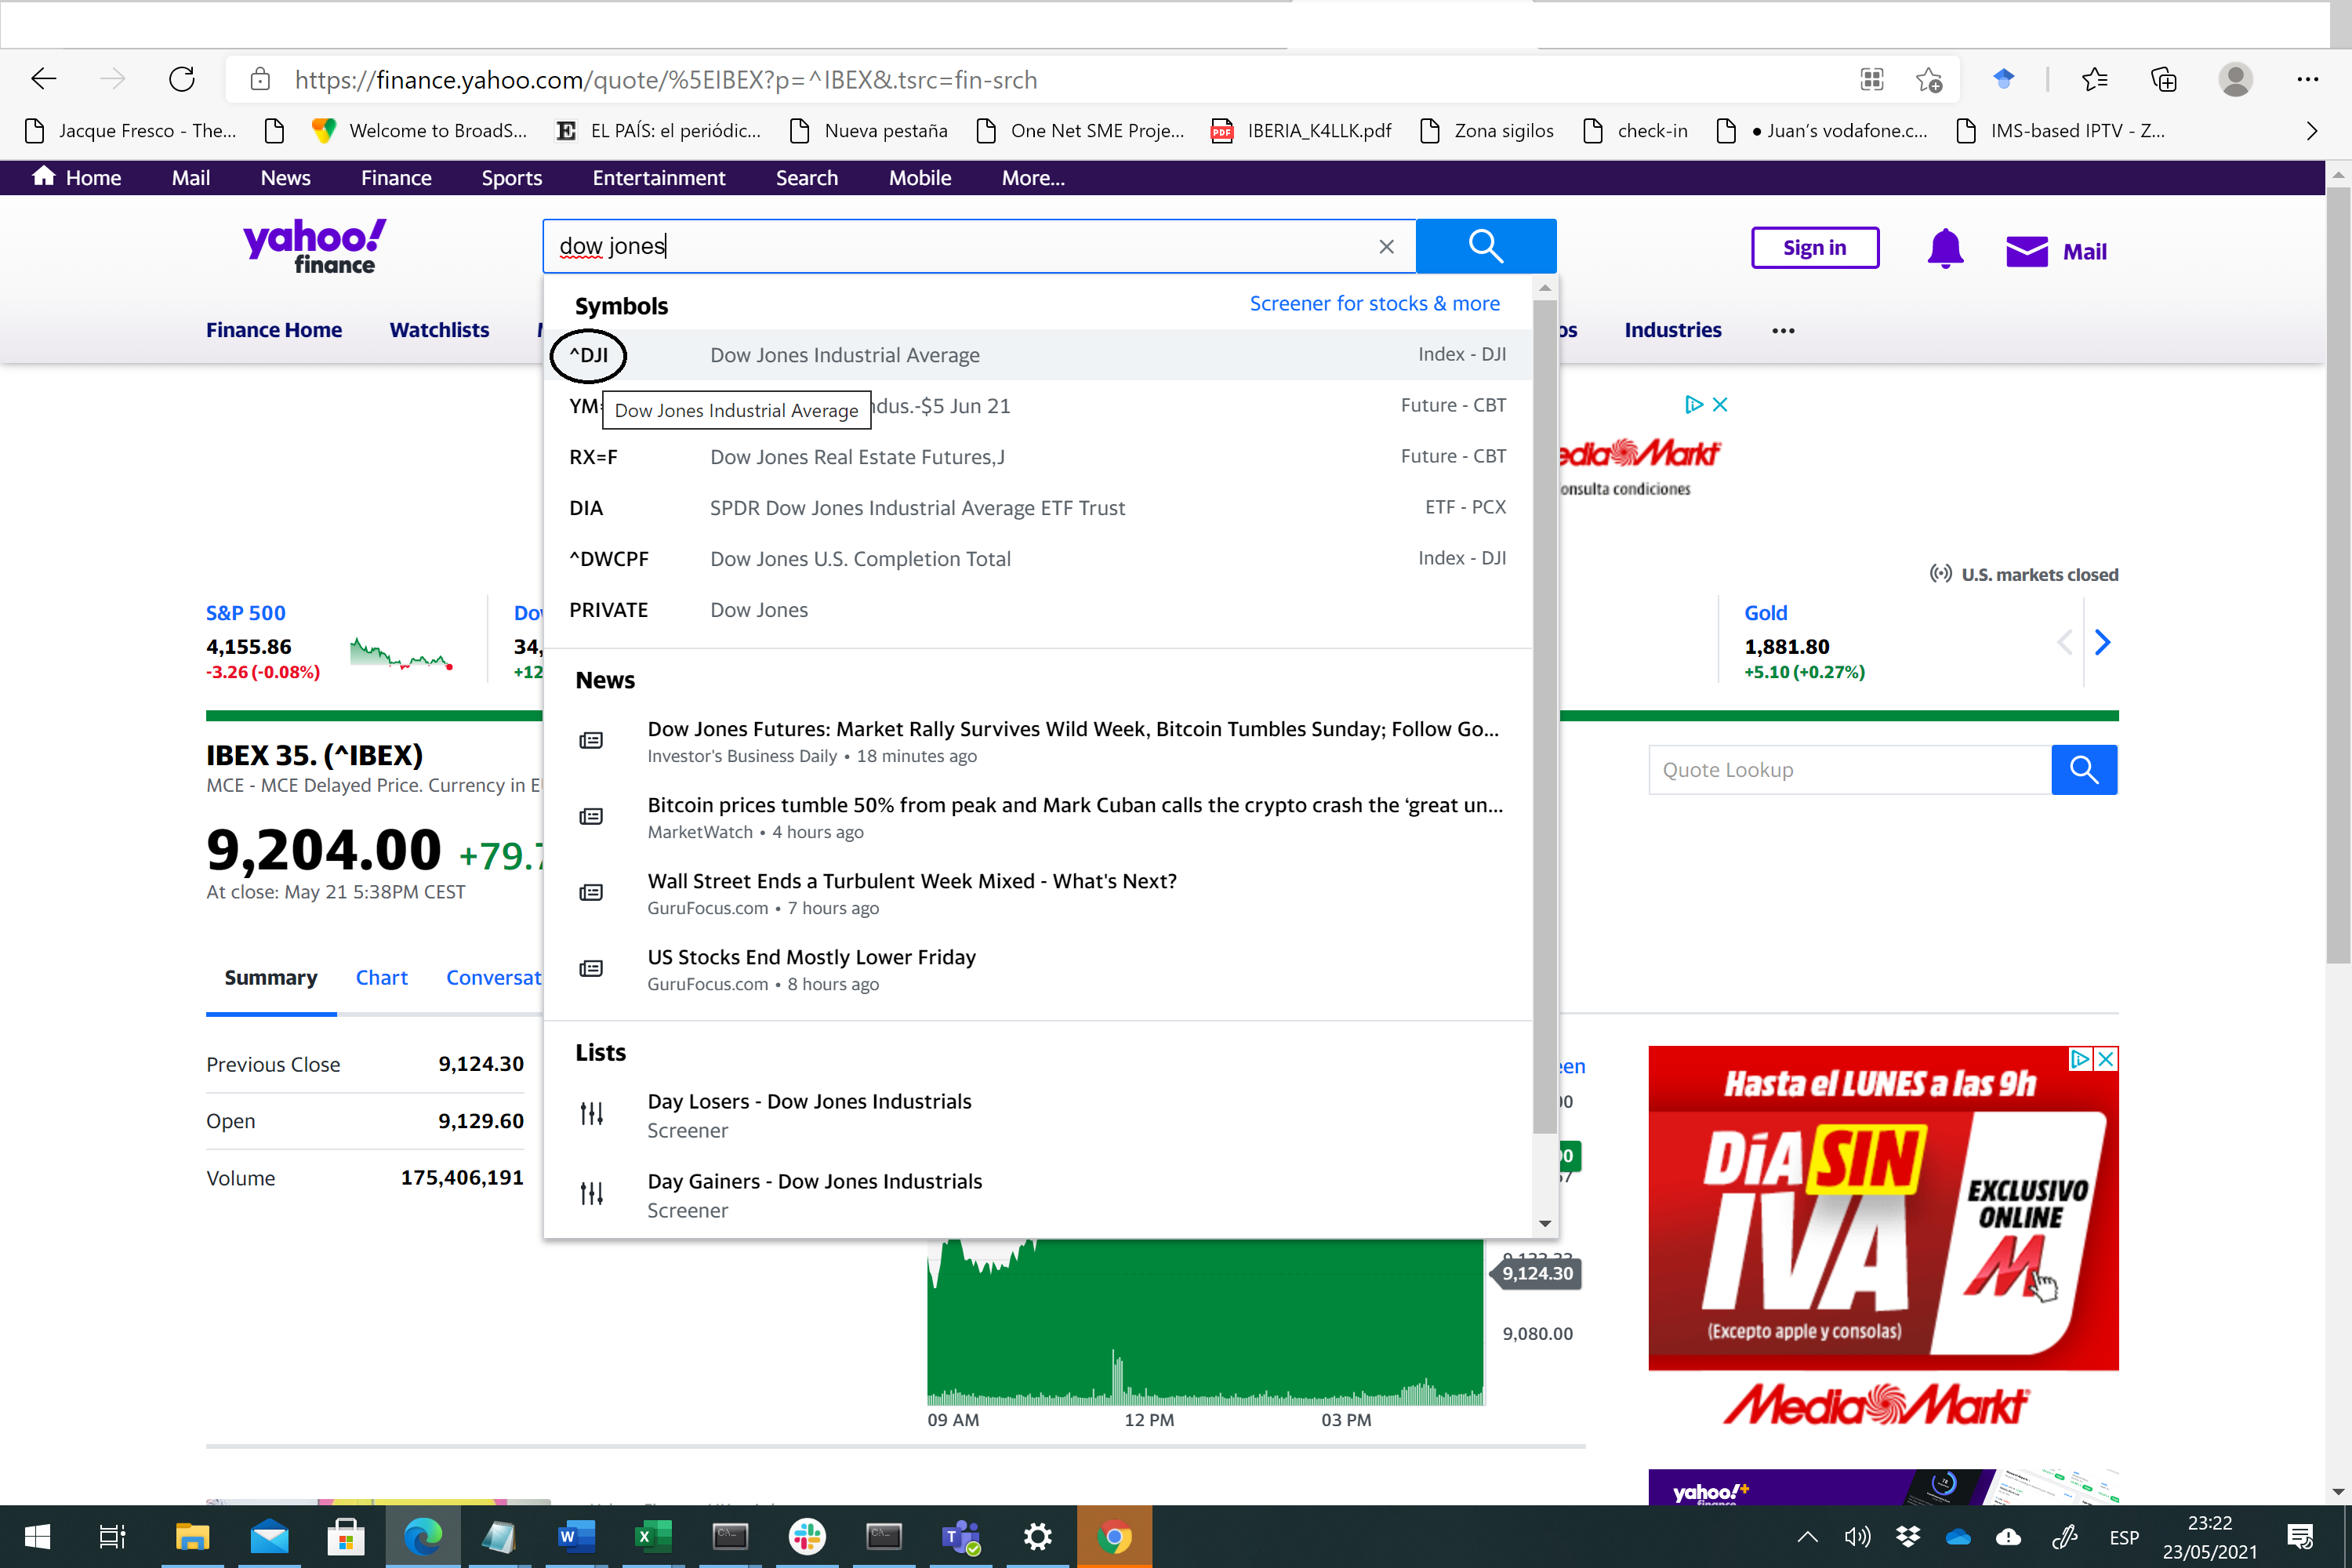

# Práctica: Solución

In [10]:
entrada=input('Introduce el id del stock que quieras consultar: ') # SE PIDE Y SE CAPTURA EL CÓDIGO DEL STOCK


#LA URL SIEMPRE TIENE EL FORMATO https://finance.yahoo.com/quote/ SEGUIDO DEL CÓDIGO DEL STOCK Y SEGUIDO DE ?p=NQ=F&.tsrc=fin-srch
#LA FORMA DE UNIR DOS TROZOS DE STRING ES STRING1 + STRING2
link="https://finance.yahoo.com/quote/"+entrada+"?p=NQ=F&.tsrc=fin-srch" 

contents=requests.get(link).text #SE CAPTURA LA URL
soup=BeautifulSoup(contents) #SE INTRODUCE LA URL EN LA INSTANCIA SOUP

'''
El tag de la cotización tiene esta forma:

<span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)">9,204.00</span>
'''

cotización=soup.find('span',class_="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)").text #SE BUSCA EL TAG DENTRO DE SOUP
print('Cotización:',cotización) #SE PRINTA EL RESULTADO

'''
El tag para la variación porcentual es:
<span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)">+79.70 (+0.87%)</span>

'''



variacion=soup.find('span',class_="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)").text #Se busca en soup el tag
print('Variación:',variacion) #Se printa la variación



Introduce el id del stock que quieras consultar: BSBR
Cotización: 8.83
Variación: +0.34 (+4.00%)
